In [1]:
import pandas as pd
import numpy as np
% matplotlib inline
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../data/spi_matches.csv", parse_dates=["date"])

In [4]:
df.loc[:, "abs_prob_diff"] = abs(df.prob1 - df.prob2)

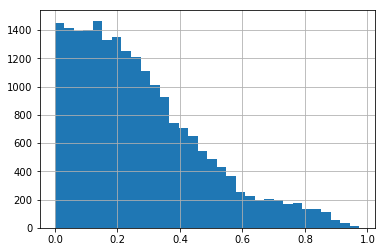

In [6]:
df.abs_prob_diff.hist(bins=32)

In [8]:
df["result"] = df.apply(
    lambda row: "H" if row.score1 > row.score2 else (
        "D" if row.score1 == row.score2 else "A"), axis=1)


In [10]:
df_res = df[~df.score1.isnull()]

In [32]:
def precision_of_draw(df, diff_thresh):
    print("Difference threshold of {}".format(diff_thresh))
    pred_draw = df[df.abs_prob_diff <= diff_thresh]
    preds = len(pred_draw)
    print("{} total predictions".format(preds))
    was_draw = pred_draw[pred_draw.result == "D"]
    correct = len(was_draw)
    return correct / preds

In [24]:
precisions = []
for i in range(0, 5):
    precisions.append(precision_of_draw(df_res, i/20))

In [25]:
precisions

[0.6666666666666666,
 0.2935500253936008,
 0.2992453812125943,
 0.2942500865950814,
 0.289418267965254]

In [35]:
df_prem = df_res[df_res.league_id == 2411]

precisions = []
for i in range(1, 5):
    precisions.append(precision_of_draw(df_prem, i/20))
precisions

Difference threshold of 0.05
91 total predictions
Difference threshold of 0.1
161 total predictions
Difference threshold of 0.15
243 total predictions
Difference threshold of 0.2
327 total predictions


[0.3076923076923077,
 0.3167701863354037,
 0.3045267489711934,
 0.30275229357798167]

In [36]:
len(df_prem)

990

In [38]:
df.head()

,date,league_id,league,team1,team2,spi1,spi2,prob1,prob2,probtie,...,score1,score2,xg1,xg2,nsxg1,nsxg2,adj_score1,adj_score2,abs_prob_diff,result
0,2016-08-12,1843,French Ligue 1,Bastia,Paris Saint-Germain,51.16,85.68,0.0463,0.8380,0.1157,...,0.0,1.0,0.97,0.63,0.43,0.45,0.00,1.05,0.7917,A
1,2016-08-12,1843,French Ligue 1,AS Monaco,Guingamp,68.85,56.48,0.5714,0.1669,0.2617,...,2.0,2.0,2.45,0.77,1.75,0.42,2.10,2.10,0.4045,D
2,2016-08-13,2411,Barclays Premier League,Hull City,Leicester City,53.57,66.81,0.3459,0.3621,0.2921,...,2.0,1.0,0.85,2.77,0.17,1.25,2.10,1.05,0.0162,H
3,2016-08-13,2411,Barclays Premier League,Crystal Palace,West Bromwich Albion,55.19,58.66,0.4214,0.2939,0.2847,...,0.0,1.0,1.11,0.68,0.84,1.60,0.00,1.05,0.1275,A
4,2016-08-13,2411,Barclays Premier League,Everton,Tottenham Hotspur,68.02,73.25,0.3910,0.3401,0.2689,...,1.0,1.0,0.73,1.11,0.88,1.81,1.05,1.05,0.0509,D


In [44]:
df_fra = df_res[df_res.league_id == 1843]
precisions = []
for i in range(1, 5):
    precisions.append(precision_of_draw(df_fra, i/20))
precisions

Difference threshold of 0.05
85 total predictions
Difference threshold of 0.1
175 total predictions
Difference threshold of 0.15
291 total predictions
Difference threshold of 0.2
396 total predictions


[0.27058823529411763,
 0.3314285714285714,
 0.31958762886597936,
 0.31565656565656564]

In [45]:
len(df_fra)

965

In [46]:
betting_fra1 = pd.concat([pd.read_csv("../data/ligue1_1617.csv", parse_dates=["Date"], dayfirst=True),
                          pd.read_csv("../data/ligue1_1718.csv", parse_dates=["Date"], dayfirst=True),
                          pd.read_csv("../data/ligue1_1819.csv", parse_dates=["Date"], dayfirst=True)])

In [47]:
fra_dict = {
    "AS Monaco": "Monaco",
    "AS Nancy Lorraine": "Nancy",
    "Dijon FCO": "Dijon",
    "Paris Saint-Germain": "Paris SG",
    "Stade Rennes": "Rennes"
}

In [48]:
df_fra.loc[:, "team1"] = df_fra.team1.apply(lambda x: fra_dict[x] if x in fra_dict.keys() else x)

df_fra.loc[:, "team2"] = df_fra.team2.apply(lambda x: fra_dict[x] if x in fra_dict.keys() else x)

/home/alexander/anaconda/envs/py36/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [49]:
betting_fra1.rename(columns={"HomeTeam": "team1", "AwayTeam": "team2", "Date": "date"}, inplace=True)

In [50]:
merged_fra = pd.merge(betting_fra1, df_fra, on=["date", "team1", "team2"])

In [51]:
merged_fra = merged_fra[["team1", "team2", 
                                 "BbMxH", "BbMxD", "BbMxA",
                                 "PSH", "PSD", "PSA", 
                                 "result", 
                                 "abs_prob_diff"]]

money at end £571.1818165180649
total matches 174
lowest bank £571.1818165180649
highest bank £4588.412819302138
ROI -1.0%
Percent of matches bet on 18.03


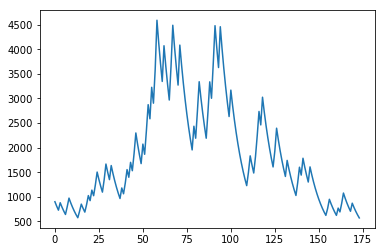

In [54]:

money_history = []
money = 1000
frac = 0.1
total_staked = 0
total_won = 0
for row in merged_fra.itertuples():
    if row.abs_prob_diff <= 0.1:
        stake = frac * money
        money -= stake
        total_staked += stake
        if row.result == "D":
            money += stake * row.BbMxD * 0.99
            total_won += stake * row.BbMxD * 0.99
        money_history.append(money)
plt.plot(money_history)
print("money at end £{}".format(money))
print("total matches {}".format(len(money_history)))
print("lowest bank £{}".format(min(money_history)))
print("highest bank £{}".format(max(money_history)))
print("ROI {}%".format(100 * (round((total_won / total_staked) - 1, 2))))
print("Percent of matches bet on {}".format(round(len(money_history) * 100 / len(df_fra), 2)))

In [60]:
df_fra[df_fra.abs_prob_diff <= 0.1].reset_index().iloc[50:100]

,index,date,league_id,league,team1,team2,spi1,spi2,prob1,prob2,...,score1,score2,xg1,xg2,nsxg1,nsxg2,adj_score1,adj_score2,abs_prob_diff,result
50,1790,2017-04-09,1843,French Ligue 1,Toulouse,Marseille,56.76,63.35,0.3897,0.3028,...,0.0,0.0,0.86,1.18,1.61,1.53,0.00,0.00,0.0869,D
51,1894,2017-04-16,1843,French Ligue 1,Nantes,Bordeaux,57.33,66.44,0.3624,0.3403,...,0.0,1.0,0.44,0.85,1.41,1.10,0.00,1.05,0.0221,A
52,1929,2017-04-21,1843,French Ligue 1,Nancy,Marseille,44.59,66.54,0.3018,0.3984,...,0.0,0.0,0.92,0.84,0.76,1.26,0.00,0.00,0.0966,D
53,1982,2017-04-23,1843,French Ligue 1,Toulouse,Nice,55.75,64.79,0.3686,0.3202,...,1.0,1.0,0.23,0.70,0.50,1.11,1.05,1.05,0.0484,D
54,2065,2017-04-29,1843,French Ligue 1,Bastia,Rennes,43.54,55.04,0.3604,0.3148,...,1.0,0.0,0.60,1.72,0.82,1.34,1.05,0.00,0.0456,H
55,2102,2017-04-30,1843,French Ligue 1,Dijon,Bordeaux,52.16,67.20,0.3115,0.4042,...,0.0,0.0,1.60,0.61,1.30,0.96,0.00,0.00,0.0927,D
56,2312,2017-05-14,1843,French Ligue 1,Metz,Toulouse,48.21,54.41,0.3977,0.2983,...,1.0,1.0,0.60,2.12,0.81,1.48,1.05,1.05,0.0994,D
57,2313,2017-05-14,1843,French Ligue 1,Bastia,Lorient,41.95,49.94,0.3530,0.3506,...,2.0,0.0,1.02,0.49,0.83,1.20,1.69,0.00,0.0024,H
58,2378,2017-05-20,1843,French Ligue 1,Nancy,St Etienne,40.99,59.41,0.3471,0.3311,...,3.0,1.0,1.69,0.70,1.02,0.60,2.84,1.05,0.0160,H
59,2390,2017-05-20,1843,French Ligue 1,Lorient,Bordeaux,48.64,66.47,0.3280,0.3854,...,1.0,1.0,0.64,1.05,1.36,0.75,1.05,1.05,0.0574,D
